In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2011-01-01'
end = '2021-12-31'

df = data.DataReader('NFLX', 'yahoo', start, end)
df.head()

In [ ]:
df.tail()

In [6]:
df = df.reset_index()
df.head()

NameError: name 'df' is not defined

In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

NameError: name 'df' is not defined

In [11]:
plt.plot(df.Close)

NameError: name 'df' is not defined

In [12]:
df

NameError: name 'df' is not defined

In [10]:
ma50 = df.Close.rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    643.693597
2766    643.341998
2767    642.793398
2768    642.255199
2769    641.801199
Name: Close, Length: 2770, dtype: float64

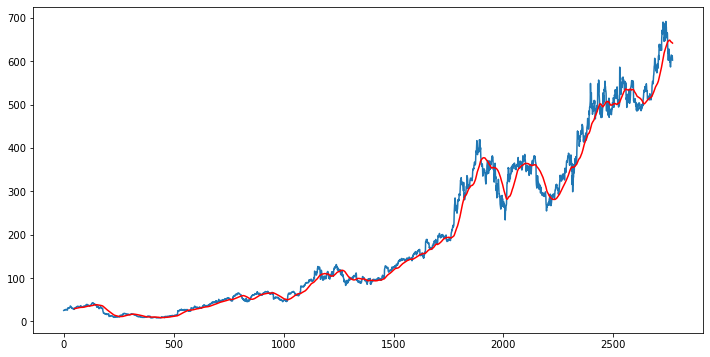

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    610.301497
2766    611.159698
2767    612.059597
2768    612.980798
2769    613.846798
Name: Close, Length: 2770, dtype: float64

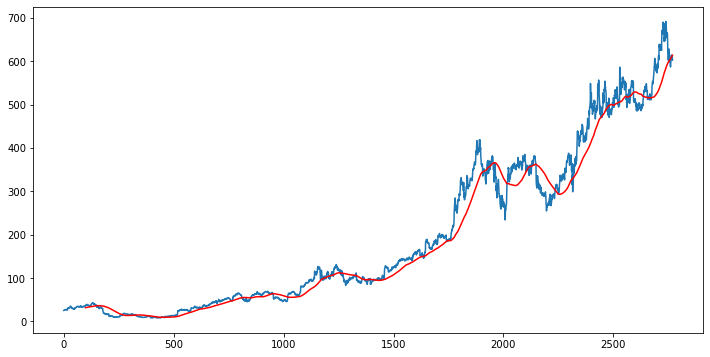

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    563.015448
2766    563.467748
2767    563.900298
2768    564.338548
2769    564.826798
Name: Close, Length: 2770, dtype: float64

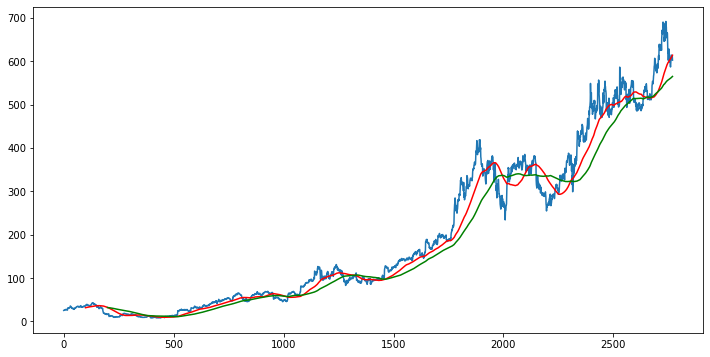

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(2770, 5)

In [17]:
# Splitting the Data into Two Parts Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [18]:
data_training.head()

,Close
0,25.100000
1,25.487143
2,25.910000
3,25.675714
4,25.427143


In [19]:
data_testing.head()

,Close
1938,368.149994
1939,364.559998
1940,350.350006
1941,367.649994
1942,366.959991


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04234124],
       [0.04328254],
       [0.04431068],
       ...,
       [0.82843984],
       [0.846724  ],
       [0.8808124 ]])

In [22]:
data_training_array.shape

(1938, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(1838, 100, 1)

In [25]:
# Machine Learning Model Creation

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 13s 177ms/step - loss: 0.0248
Epoch 2/50
58/58 [==============================] - 10s 170ms/step - loss: 0.0055
Epoch 3/50
58/58 [==============================] - 10s 169ms/step - loss: 0.0040
Epoch 4/50
58/58 [==============================] - 10s 170ms/step - loss: 0.0031
Epoch 5/50
58/58 [==============================] - 10s 169ms/step - loss: 0.0030
Epoch 6/50
58/58 [==============================] - 10s 168ms/step - loss: 0.0027
Epoch 7/50
58/58 [==============================] - 10s 168ms/step - loss: 0.0025
Epoch 8/50
58/58 [==============================] - 10s 168ms/step - loss: 0.0027
Epoch 9/50
58/58 [==============================] - 10s 168ms/step - loss: 0.0027
Epoch 10/50
58/58 [==============================] - 10s 169ms/step - loss: 0.0031
Epoch 11/50
58/58 [==============================] - 10s 168ms/step - loss: 0.0028
Epoch 12/50
58/58 [==============================] - 10s 168ms/step - loss: 0.0025
Epoch 13/50
5

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
1938,368.149994
1939,364.559998
1940,350.350006
1941,367.649994
1942,366.959991


In [31]:
data_training.tail(100)

,Close
1838,318.690002
1839,307.019989
1840,305.760010
1841,313.980011
1842,311.760010
...,...
1933,346.459991
1934,348.679993
1935,348.410004
1936,355.929993


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [34]:
final_df.head()

,Close
0,318.690002
1,307.019989
2,305.760010
3,313.980011
4,311.760010


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.18525152],
       [0.15976057],
       [0.15700838],
       [0.17496343],
       [0.17011425],
       [0.17164323],
       [0.17347804],
       [0.1736091 ],
       [0.16996133],
       [0.18830954],
       [0.20178678],
       [0.20316291],
       [0.21061135],
       [0.20908237],
       [0.2022236 ],
       [0.20674514],
       [0.20150281],
       [0.20600249],
       [0.19951508],
       [0.19724337],
       [0.21393155],
       [0.21349466],
       [0.24210917],
       [0.25209149],
       [0.25646011],
       [0.25305259],
       [0.26137482],
       [0.25713724],
       [0.27533254],
       [0.27943905],
       [0.28815444],
       [0.29175861],
       [0.27854348],
       [0.27673053],
       [0.27865273],
       [0.28385134],
       [0.31901878],
       [0.34728379],
       [0.34533978],
       [0.34188853],
       [0.37373584],
       [0.39946704],
       [0.39658373],
       [0.38708196],
       [0.32895744],
       [0.36152555],
       [0.34186674],
       [0.352

In [7]:
input_data.shape

NameError: name 'input_data' is not defined

In [6]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

NameError: name 'input_data' is not defined

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [39]:
# Making Stock Price Prediction

y_predicted = model.predict(x_test)

In [40]:
y_predicted.shape

(832, 1)

In [41]:
y_test

array([0.29328759, 0.28544591, 0.25440685, 0.29219543, 0.29068825,
       0.28719334, 0.27808479, 0.29647666, 0.2960835 , 0.31454097,
       0.32072254, 0.3063498 , 0.32229525, 0.3129246 , 0.31272795,
       0.28345818, 0.25659117, 0.25167646, 0.26611474, 0.20097859,
       0.19051572, 0.23083811, 0.21679299, 0.24577879, 0.28575175,
       0.24645593, 0.21578823, 0.20895132, 0.21685852, 0.14842398,
       0.17253881, 0.14405535, 0.11131254, 0.11343132, 0.14831479,
       0.18239008, 0.16430397, 0.1781525 , 0.16810465, 0.20449531,
       0.18356962, 0.15200628, 0.13147376, 0.13219456, 0.11544092,
       0.12271465, 0.11430503, 0.08020795, 0.07230075, 0.06170682,
       0.05447675, 0.06017778, 0.07153623, 0.10652889, 0.1198532 ,
       0.11413032, 0.12323886, 0.0905397 , 0.1070313 , 0.06828162,
       0.07824208, 0.06867478, 0.0895568 , 0.09204688, 0.07199491,
       0.06317027, 0.08095061, 0.071842  , 0.0583211 , 0.02732573,
       0.        , 0.04322753, 0.04737774, 0.04849169, 0.07378

In [42]:
y_predicted

array([[0.25885957],
       [0.25961888],
       [0.26046067],
       [0.261316  ],
       [0.26226994],
       [0.26340422],
       [0.264739  ],
       [0.2661903 ],
       [0.26776418],
       [0.26947325],
       [0.2714393 ],
       [0.27380598],
       [0.27653348],
       [0.27961192],
       [0.28292346],
       [0.28630847],
       [0.28939885],
       [0.29170054],
       [0.29283753],
       [0.29274672],
       [0.29119933],
       [0.2880545 ],
       [0.28356004],
       [0.27808595],
       [0.27211985],
       [0.266196  ],
       [0.2606519 ],
       [0.25559717],
       [0.25099105],
       [0.24678174],
       [0.24284898],
       [0.23918374],
       [0.23580232],
       [0.23270848],
       [0.22962663],
       [0.22618368],
       [0.2222347 ],
       [0.21783851],
       [0.2133593 ],
       [0.20911169],
       [0.20555086],
       [0.20288622],
       [0.20101736],
       [0.1996194 ],
       [0.1982634 ],
       [0.19640593],
       [0.1936099 ],
       [0.189

In [43]:
scaler.scale_

array([0.00218431])

In [44]:
scale_factor = 1/0.00218431
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

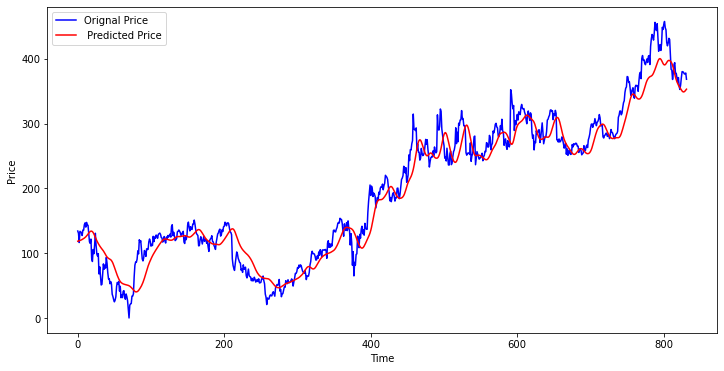

In [45]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()